<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/3/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from pylab import *
import sys

In [2]:
K = 2    # 2クラス分類
N = 100  # データ数

In [3]:
def f(x1, W_t):
    # 決定境界の直線の方程式
    a = - ((W_t[0,1]-W_t[1,1]) / (W_t[0,2]-W_t[1,2]))
    b = - (W_t[0,0]-W_t[1,0])/(W_t[0,2]-W_t[1,2])
    return a * x1 + b

In [4]:
# 訓練データを作成
cls1 = []
cls2 = []

# データは正規分布に従って生成
mean1 = [-1, 2]  # クラス1の平均
mean2 = [1, -1]  # クラス2の平均
cov = [[1.0,0.8], [0.8,1.0]]  # 共分散行列（全クラス共通）

# ノイズなしデータ
cls1.extend(np.random.multivariate_normal(mean1, cov, N//2))
cls2.extend(np.random.multivariate_normal(mean2, cov, N//2))

# データ行列Xを作成
temp = vstack((cls1, cls2))
temp2 = ones((N, 1))  # バイアスw_0用に1を追加
X = hstack((temp2, temp))

# ラベル行列T（1-of-K表記）を作成
T = []
for i in range(N//2):
    T.append(array([1, 0]))  # クラス1
for i in range(N//2):
    T.append(array([0, 1]))  # クラス2
T = array(T)

In [5]:
# パラメータ行列Wを最小二乗法で計算（式4.16）
X_t = np.transpose(X)
temp = np.linalg.inv(np.dot(X_t, X))  # 行列の積はnp.dot(A, B)
W = np.dot(np.dot(temp, X_t), T)
W_t = np.transpose(W)
print(W_t)

[[ 0.41327658 -0.16553714  0.19704481]
 [ 0.58672342  0.16553714 -0.19704481]]


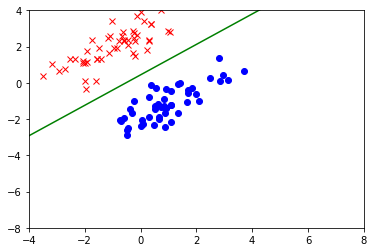

In [6]:
# 訓練データを描画
x1, x2 = np.transpose(np.array(cls1))
plot(x1, x2, 'rx')

x1, x2 = np.transpose(np.array(cls2))
plot(x1, x2, 'bo')

# 識別境界を描画
x1 = np.linspace(-4, 8, 1000)
x2 = [f(x, W_t) for x in x1]
plot(x1, x2, 'g-')

xlim(-4, 8)
ylim(-8, 4)
show()

In [7]:
 # 訓練データを作成
cls1 = []
cls2 = []

mean1 = [-1, 2]  # クラス1の平均
mean2 = [1, -1]  # クラス2の平均
mean3 = [8, -6]  # クラス2のノイズデータの平均
cov = [[1.0,0.8], [0.8,1.0]]  # 共分散行列（全クラス共通）

# ノイズありデータ
cls1.extend(np.random.multivariate_normal(mean1, cov, N//2))
cls2.extend(np.random.multivariate_normal(mean2, cov, N//2-20))
cls2.extend(np.random.multivariate_normal(mean3, cov, 20))  # 20個だけクラス2にノイズデータ追加

# データ行列Xを作成
temp = vstack((cls1, cls2))
temp2 = ones((N, 1))  # バイアスw_0用に1を追加
X = hstack((temp2, temp))

# ラベル行列T（1-of-K表記）を作成
T = []
for i in range(N//2):
    T.append(array([1, 0]))  # クラス1
for i in range(N//2):
    T.append(array([0, 1]))  # クラス2
T = array(T)

In [8]:
# パラメータ行列Wを最小二乗法で計算（式4.16）
X_t = np.transpose(X)
temp = np.linalg.inv(np.dot(X_t, X))  # 行列の積はnp.dot(A, B)
W = np.dot(np.dot(temp, X_t), T)
W_t = np.transpose(W)
print(W_t)

[[ 0.55152281  0.01285513  0.13724052]
 [ 0.44847719 -0.01285513 -0.13724052]]


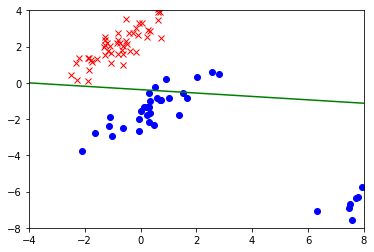

In [9]:
# 訓練データを描画
x1, x2 = np.transpose(np.array(cls1))
plot(x1, x2, 'rx')

x1, x2 = np.transpose(np.array(cls2))
plot(x1, x2, 'bo')

# 識別境界を描画
x1 = np.linspace(-4, 8, 1000)
x2 = [f(x, W_t) for x in x1]
plot(x1, x2, 'g-')

xlim(-4, 8)
ylim(-8, 4)
show()